<a href="https://colab.research.google.com/github/fawniechau/Seattle-Weather/blob/main/Chau_DATA_3320_Seattle_St_Louis_Data_Preparation_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this notebook is to data preparation work for the recorded rainy weathers in Seattle and St. Louis cities. The steps will be explained in a manner that an average reader can easily follow along.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

Load the St. Louis data set

In [ ]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

To begin, examine the header of each data frame, which displays the column names and provides a preview of several sample values for each column.

The default of "head()" will show the first 5 rows of the DataFrame. This is a useful method to quickly inspect the structure and content of the DataFrame. 

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


We can reference the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) to see the definition of each variable.

Now, we are going to use the `info` method to check the data types, size of the DataFrame, and numbers of missing values. 

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


The data types in the St. Louis data set are the same as those in the Seattle data set. However, it is worth noting that the St. Louis data set has a considerably larger number of observations compared to the Seattle data set. While we have previously established that the St. Louis data set covers the year 2017, the increased number of observations cannot be solely attributed to this fact.

**Why might the St. Louis data set be larger?**
The difference in the number of observations between the two data sets may be attributed to various factors, such as missing data in the Seattle Rain dataset and differences in the frequency and spatial coverage of data collection. For instance, the St. Louis data set may have been collected on a daily basis, covering a larger geographical area than the Seattle data set, which may have been collected less frequently or over a smaller spatial region.



Now we are going to use `unique()` to return an array of unique values in the 'STATION' column of each DataFrame. This is useful for understanding how many unique weather stations are included in the St. Louis dataset.

In [ ]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [ ]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

We are going to use `value_counts()` to return a count of how many times each unqiue value occurs in the 'STATION' column for each data set. 

This is useful for identifying how many observations each station contributed to the St. Louis dataset, and can give insights into which stations may have a more complete or representative set of data.

In [ ]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

## Convert data types, if necessary

###Converting `DATE` to datetime

It is important to convert dates to `datetime` types (or `int`) before plotting the data, because when dates are strings or objects, a plot will show successive values next to each other without recognizing possible gaps in dates.

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [ ]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

## Identify and deal with missing values

Let's check for missing data using the `isnull()` function for each data set. 

In [ ]:
print(df_seattle.isnull().sum())

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64


In [ ]:
print(df_stlouis.isnull().sum())

STATION        0
NAME           0
DATE           0
DAPR       53408
MDPR       53411
PRCP        1431
SNOW       21407
SNWD       41739
dtype: int64


Both data sets are missing values in `DAPR, MDPR, PRCP, SNOW, SNWD` with the Seattle data set additionally missing data in `WESD` and `WESF`. 

For example, we can take a look at the output for St. Louis and see that `DAPR` column is missing 53,408 values.

### Impute missing values

Now we are going to fill in missing data with the mean value of the column with '`fillna()`. 

In [ ]:
df_seattle = df_seattle.fillna(df_seattle.mean())

<ipython-input-21-16d01c89cb93>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_seattle = df_seattle.fillna(df_seattle.mean())
<ipython-input-21-16d01c89cb93>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_seattle = df_seattle.fillna(df_seattle.mean())


In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,5.608696,0.466087,0.00,0.168555,1.333333,0.486667,0.092857
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,5.608696,0.466087,0.00,0.168555,1.333333,0.486667,0.092857
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,5.608696,0.466087,0.00,0.168555,1.333333,0.486667,0.092857
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,5.608696,0.466087,0.00,0.168555,1.333333,0.486667,0.092857
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,5.608696,0.466087,0.25,0.168555,1.333333,0.486667,0.092857


In [ ]:
df_stlouis = df_stlouis.fillna(df_stlouis.mean())

<ipython-input-23-5423ba187a05>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_stlouis = df_stlouis.fillna(df_stlouis.mean())
<ipython-input-23-5423ba187a05>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stlouis = df_stlouis.fillna(df_stlouis.mean())


In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,3.933105,0.730662,0.00,0.000000,0.122376
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,3.933105,0.730662,0.35,0.032062,0.122376
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,3.933105,0.730662,0.03,0.032062,0.122376
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,3.933105,0.730662,0.04,1.200000,0.122376
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,3.933105,0.730662,0.00,0.000000,1.000000


Let's check again using the `isnull()` function. 

In [ ]:
print(df_seattle.isnull().sum())

STATION    0
NAME       0
DATE       0
DAPR       0
MDPR       0
PRCP       0
SNOW       0
SNWD       0
WESD       0
WESF       0
dtype: int64


In [ ]:
print(df_stlouis.isnull().sum())

STATION    0
NAME       0
DATE       0
DAPR       0
MDPR       0
PRCP       0
SNOW       0
SNWD       0
dtype: int64


Great! We can tell that there's no missing data now since all the columns have the value 0. 

Now, we are going to plot the daily precipitation data for Seattle and then St. Louis.

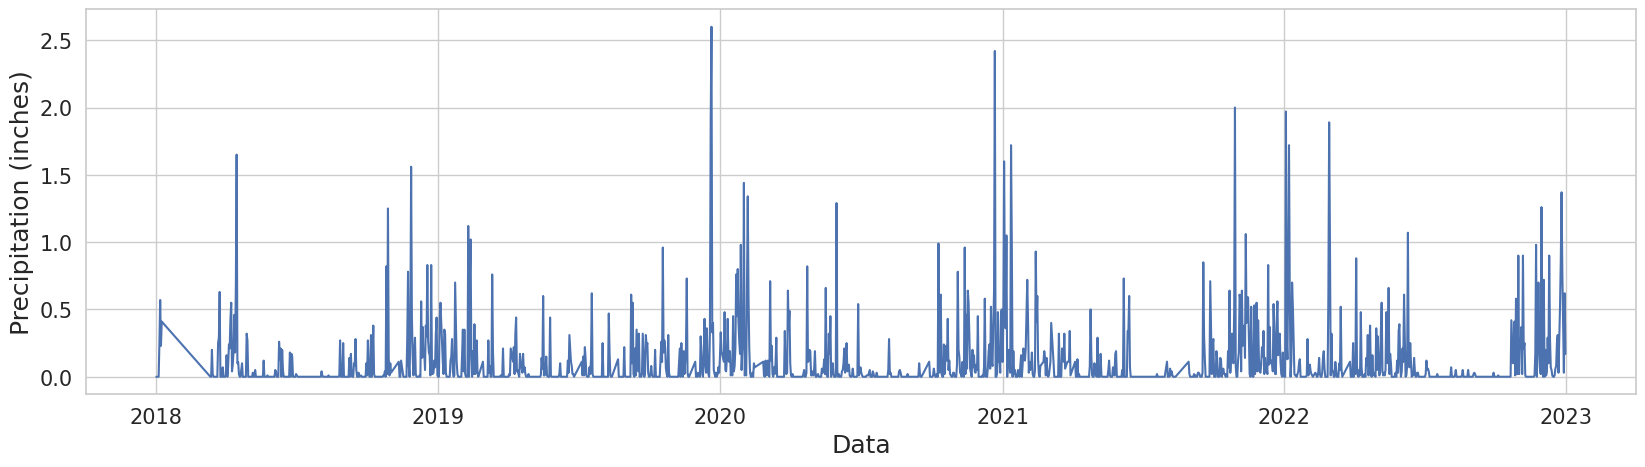

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Data', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

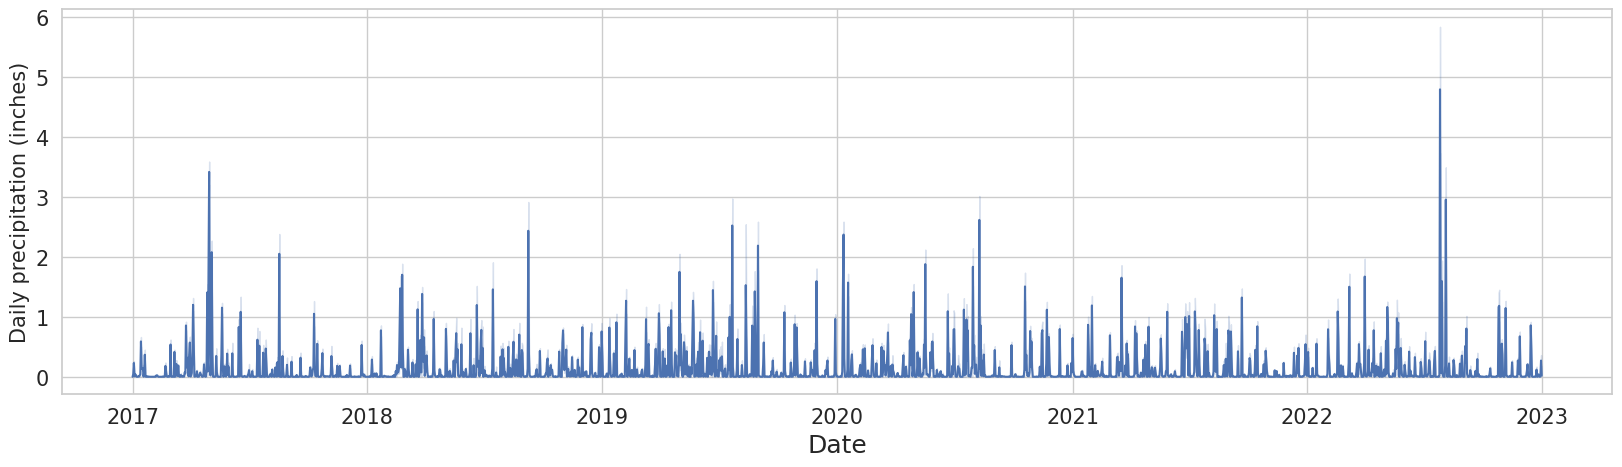

In [ ]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
plt.tick_params(labelsize=15);

Here is the breakdown of the plotted code:  

*  `plt.figure(figsize = (20,5)):` This sets the figure size of the plot to be 20 units wide and 5 units tall. This can help make the plot easier to read and interpret.
*  `sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP'):` This generates a line plot of daily precipitation for the St. Louis dataset using the Seaborn library. The data parameter specifies the dataset to use (df_stlouis), while the x and y parameters specify the variables to plot on the x- and y-axes, respectively.
* `plt.xlabel('Date', fontsize = 15):` This sets the label for the x-axis to "Date" and sets the font size to 15.
* `plt.ylabel('Daily precipitation (inches)', fontsize = 15):` This sets the label for the y-axis to "Daily precipitation (inches)" and sets the font size to 15.
* `plt.tick_params(labelsize=15):` This sets the font size of the tick labels on the x- and y-axes to 15.

## Select relevant subsets of the data

Select the column containing precipitation `PRCP` using dictionary-style indexing. 

This command will return all the values in the `PRCP` column of the dataset.

In [ ]:
df_seattle['PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

Use explicit array-style indexing with loc.

The `loc` function is used to access the data based on labels rather than just the column name. 

In [ ]:
df_seattle.loc[:,'PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

Use implicit array-style indexing with `.iloc`

The `.iloc` attribute is used to select rows and columns by integer-based indexing. "iloc" stands for "integer location". 

In [ ]:
df_seattle.iloc[:,5]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

###Select multiple columns

Select the columns containing `STATION`, `DATE`, and precipitation `PRCP`.

In [ ]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [ ]:
df_seattle.loc[:, ['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [ ]:
df_seattle.iloc[:, [0, 2, 5]]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


The code above selects the columns at integer locations 0, 2, 5.

#### Select a range of columns

Select all columns from `STATION` through `PRCP`, which also reveals other columns inbetween like `NAME`, `DATE`, `DAPR`, `MDPR`. 

In [ ]:
df_seattle.loc[:,'STATION':'PRCP']

,STATION,NAME,DATE,DAPR,MDPR,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,5.608696,0.466087,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,5.608696,0.466087,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,5.608696,0.466087,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,5.608696,0.466087,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,5.608696,0.466087,0.25
...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,5.608696,0.466087,0.78
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,5.608696,0.466087,0.40
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,5.608696,0.466087,0.03
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,5.608696,0.466087,0.62


### Select the first $n$ rows

Select the first 3 rows using the `.head()` method and adding the value 3 in the parentheses. 

In [ ]:
df_seattle.head(3)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857


Now use implicit indexing

In [ ]:
df_seattle.iloc[:3]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857


Use explicit indexing 

In [ ]:
df_seattle.loc[:2]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,5.608696,0.466087,0.0,0.168555,1.333333,0.486667,0.092857


### Select the last $n$ rows

Use the `.tail()` method to give you the last 3 rows of the Seattle data set. 

In [ ]:
df_seattle.tail(3)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,5.608696,0.466087,0.03,0.168555,1.333333,0.486667,0.092857
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,5.608696,0.466087,0.62,0.168555,1.333333,0.486667,0.092857
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,5.608696,0.466087,0.17,0.168555,1.333333,0.486667,0.092857


Use implicit indexing by adding a negative 3 value in the brackets. 

In [ ]:
df_seattle.iloc[-3:]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,5.608696,0.466087,0.03,0.168555,1.333333,0.486667,0.092857
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,5.608696,0.466087,0.62,0.168555,1.333333,0.486667,0.092857
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,5.608696,0.466087,0.17,0.168555,1.333333,0.486667,0.092857


Use explicit indexing 

In [ ]:
df_seattle.loc[len(df_seattle)-3:]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,5.608696,0.466087,0.03,0.168555,1.333333,0.486667,0.092857
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,5.608696,0.466087,0.62,0.168555,1.333333,0.486667,0.092857
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-31,5.608696,0.466087,0.17,0.168555,1.333333,0.486667,0.092857


### Select rows using logical indexing

Logical indexing is where we select or filter the elements of a DataFrame that satisfy a certain logical condition. 

Select rows where `PRCP` is greater than 0. 

In [ ]:
df_seattle['PRCP'] > 0

0       False
1       False
2       False
3       False
4        True
        ...  
1653     True
1654     True
1655     True
1656     True
1657     True
Name: PRCP, Length: 1658, dtype: bool

In [ ]:
df_seattle[df_seattle['PRCP'] > 0]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,5.608696,0.466087,0.25,0.168555,1.333333,0.486667,0.092857
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,5.608696,0.466087,0.57,0.168555,1.333333,0.486667,0.092857
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,5.608696,0.466087,0.23,0.168555,1.333333,0.486667,0.092857
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,5.608696,0.466087,0.41,0.168555,1.333333,0.486667,0.092857
10,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-14,5.608696,0.466087,0.20,0.168555,1.333333,0.486667,0.092857
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-27,5.608696,0.466087,0.78,0.168555,1.333333,0.486667,0.092857
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-28,5.608696,0.466087,0.40,0.168555,1.333333,0.486667,0.092857
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-29,5.608696,0.466087,0.03,0.168555,1.333333,0.486667,0.092857
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2022-12-30,5.608696,0.466087,0.62,0.168555,1.333333,0.486667,0.092857


Select the rows where the precipitation is between 0.5 and 0.75 inches 

In [ ]:
df_seattle[df_seattle['PRCP'].between(0.5, 0.75)]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,5.608696,0.466087,0.57,0.168555,1.333333,0.486667,0.092857
20,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-24,5.608696,0.466087,0.63,0.168555,1.333333,0.486667,0.092857
35,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-08,5.608696,0.466087,0.55,0.168555,1.333333,0.486667,0.092857
41,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-04-14,5.608696,0.466087,0.68,0.168555,1.333333,0.486667,0.092857
271,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-12-10,5.608696,0.466087,0.56,0.168555,1.333333,0.486667,0.092857
296,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-04,5.608696,0.466087,0.55,0.168555,1.333333,0.486667,0.092857
313,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-01-23,5.608696,0.466087,0.70,0.168555,1.333333,0.486667,0.092857
331,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-02-11,5.608696,0.466087,0.70,4.000000,1.333333,0.486667,0.092857
419,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-05-17,5.608696,0.466087,0.60,0.168555,1.333333,0.486667,0.092857
472,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2019-07-19,5.608696,0.466087,0.62,0.168555,1.333333,0.486667,0.092857


## Return to selecting the relevant subsets

We saw that the St. Louis data set contains data prior to 2018. Limit the St. Louis data to 2018 and beyond.

In [ ]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,3.933105,0.730662,0.00,0.200000,1.000000
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,3.933105,0.730662,0.24,0.032062,0.122376
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,3.933105,0.730662,0.00,0.032062,0.122376
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,3.933105,0.730662,0.02,0.032062,0.122376
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,3.933105,0.730662,0.05,0.500000,0.122376


To address the question as to why the St. Louis data set is much larger than the Seattle data set, here is a data process step we can use to drop this issue. 

In [ ]:
# Convert the DATE column to datetime format
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])


In [ ]:
# Resample the data to weekly frequency, averaging the precipitation values
df_stlouis_weekly = df_stlouis.resample('W', on='DATE').mean()



In [ ]:
# Select only the columns of interest (i.e., STATION DATE and PRCP)
df_stlouis[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
241,US1MOSS0027,2018-01-05,0.00
242,US1MOSS0027,2018-01-08,0.24
243,US1MOSS0027,2018-01-10,0.00
244,US1MOSS0027,2018-01-11,0.02
245,US1MOSS0027,2018-01-15,0.05
...,...,...,...
54569,US1MOSL0084,2022-12-08,0.00
54570,US1MOSL0084,2022-12-13,0.00
54571,US1MOSL0084,2022-12-14,0.89
54572,US1MOSL0084,2022-12-15,0.36


In [ ]:
# Filter the data to match the time range of the Seattle data set
start_date = '2010-01-01'
end_date = '2018-12-31'
df_stlouis = df_stlouis.loc[(df_stlouis['DATE'] >= start_date) & (df_stlouis['DATE'] <= end_date)]

# Reset the index
df_stlouis = df_stlouis.reset_index(drop=True)

We also saw that the St. Louis data set was much larger than the Seattle data set. How many stations are present in the St. Louis data set?

In [ ]:
df_stlouis['STATION'].value_counts()

Series([], Name: STATION, dtype: int64)

The St. Louis data set has values for many weather stations, while the Seattle data set has only one weather station. 

We will focus on the data from the airport in St. Louis.

In [ ]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [ ]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Tutorial on joins

In [ ]:
df1 = pd.DataFrame({'day':[1, 2, 3, 4, 5], 'prcp':[0.1, 0.2, 0.3, 0.4, 0.5 ]})
df1

,day,prcp
0,1,0.1
1,2,0.2
2,3,0.3
3,4,0.4
4,5,0.5


This code creates a table with two columns called "day" and "prcp". The "day" column has numbers from 1 to 5, and the "prcp" column has some numbers that might represent how much rain fell on each of those days. The table is stored in a variable called "df1" which we can use later in our code.

In [ ]:
df2 = pd.DataFrame({'day':[1, 3, 5, 7], 'prcp':[1.1, 1.3, 1.5, 1.7]})
df2

,day,prcp
0,1,1.1
1,3,1.3
2,5,1.5
3,7,1.7


Join using the keys from only one DataFrame (left one) 

And join using keys from both DataFrames (df1 and df2). 

In [ ]:
df1.merge(df2, on = 'day', how = 'left')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


In [ ]:
df2.merge(df1, on = 'day', how = 'left')

,day,prcp_x,prcp_y
0,1,1.1,0.1
1,3,1.3,0.3
2,5,1.5,0.5
3,7,1.7,NaN


The "df1" and "df2" are parts that are stored. 
The "on='day'" part means that the computer should look at the "day" column in both lists to figure out how to match them up. 
And the "how='left'" part means that if there's a day in the first list (df1) that's not in the second list (df2), it should still include it in the result, but if there's a day in the second list that's not in the first list, it will be excluded.



In [ ]:
df1.merge(df2, on = 'day', how = 'outer')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5
5,7,NaN,1.7


Now, the "outer" part means that we want to include all the days from both lists, even if they don't match up perfectly. 

Join using the keys that are common to both the DataFrames

In [ ]:
df1.merge(df2, on = 'day', how = 'inner')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,3,0.3,1.3
2,5,0.5,1.5


## Join data frames keeping `DATE` and `PRCP` columns

St. Louis has data for all dates, so we are going to do a left join with St. Louis as the left data set.

But first, we have to convert the `DATE` column in both data sets to be able to merge the two. 

In [ ]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [ ]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

In [ ]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2017-01-01,0.00,NaN
1,2017-01-03,0.35,NaN
2,2017-01-04,0.03,NaN
3,2017-01-05,0.04,NaN
4,2017-01-06,0.00,NaN


Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. Normally, I would rename the columns at this point to something more informative. However, I know that I want to convert the DataFrame to a tidy format and I will modify the names later.

## Create a tidy data frame with columns for city and precipitation

## Tutorial on tidy data

In [ ]:
df_join = df1.merge(df2, on = 'day', how = 'left')

df_join

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


Create a "tidy" DataFrame using `df_tidy`

`pd.melt()` is used to reshape data frames from a wide format to a long format, making it more convenient for data analysis.

In [ ]:
df_tidy = pd.melt(df_join, id_vars = 'day', var_name = 'CITY', value_name = 'PRCP')

df_tidy

,day,CITY,PRCP
0,1,prcp_x,0.1
1,2,prcp_x,0.2
2,3,prcp_x,0.3
3,4,prcp_x,0.4
4,5,prcp_x,0.5
5,1,prcp_y,1.1
6,2,prcp_y,NaN
7,3,prcp_y,1.3
8,4,prcp_y,NaN
9,5,prcp_y,1.5


Let's rename the city values 

In [ ]:
df_tidy.loc[df_tidy['CITY'] == 'prcp_x','CITY'] = 'city 1'

df_tidy.loc[df_tidy['CITY'] == 'prcp_y','CITY'] = 'city 2'

In [ ]:
df_tidy

,day,CITY,PRCP
0,1,city 1,0.1
1,2,city 1,0.2
2,3,city 1,0.3
3,4,city 1,0.4
4,5,city 1,0.5
5,1,city 2,1.1
6,2,city 2,NaN
7,3,city 2,1.3
8,4,city 2,NaN
9,5,city 2,1.5


### Rename columns or values to follow best practices

In [ ]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

Let's rename the city values 'STL' and 'SEA' 

In [ ]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [ ]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [ ]:
df.head()

,DATE,CITY,PRCP
0,2017-01-01,STL,0.00
1,2017-01-03,STL,0.35
2,2017-01-04,STL,0.03
3,2017-01-05,STL,0.04
4,2017-01-06,STL,0.00


In [ ]:
df.tail()

,DATE,CITY,PRCP
109143,2022-12-08,SEA,0.29
109144,2022-12-13,SEA,0.05
109145,2022-12-14,SEA,0.01
109146,2022-12-15,SEA,0.00
109147,2022-12-16,SEA,0.00


Rename the columns to be lowercase and more easily understood using `df.rename()`

In [ ]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

In [ ]:
df.head()

,date,city,precipitation
0,2017-01-01,STL,0.00
1,2017-01-03,STL,0.35
2,2017-01-04,STL,0.03
3,2017-01-05,STL,0.04
4,2017-01-06,STL,0.00


## Deal with missing values

<Axes: >

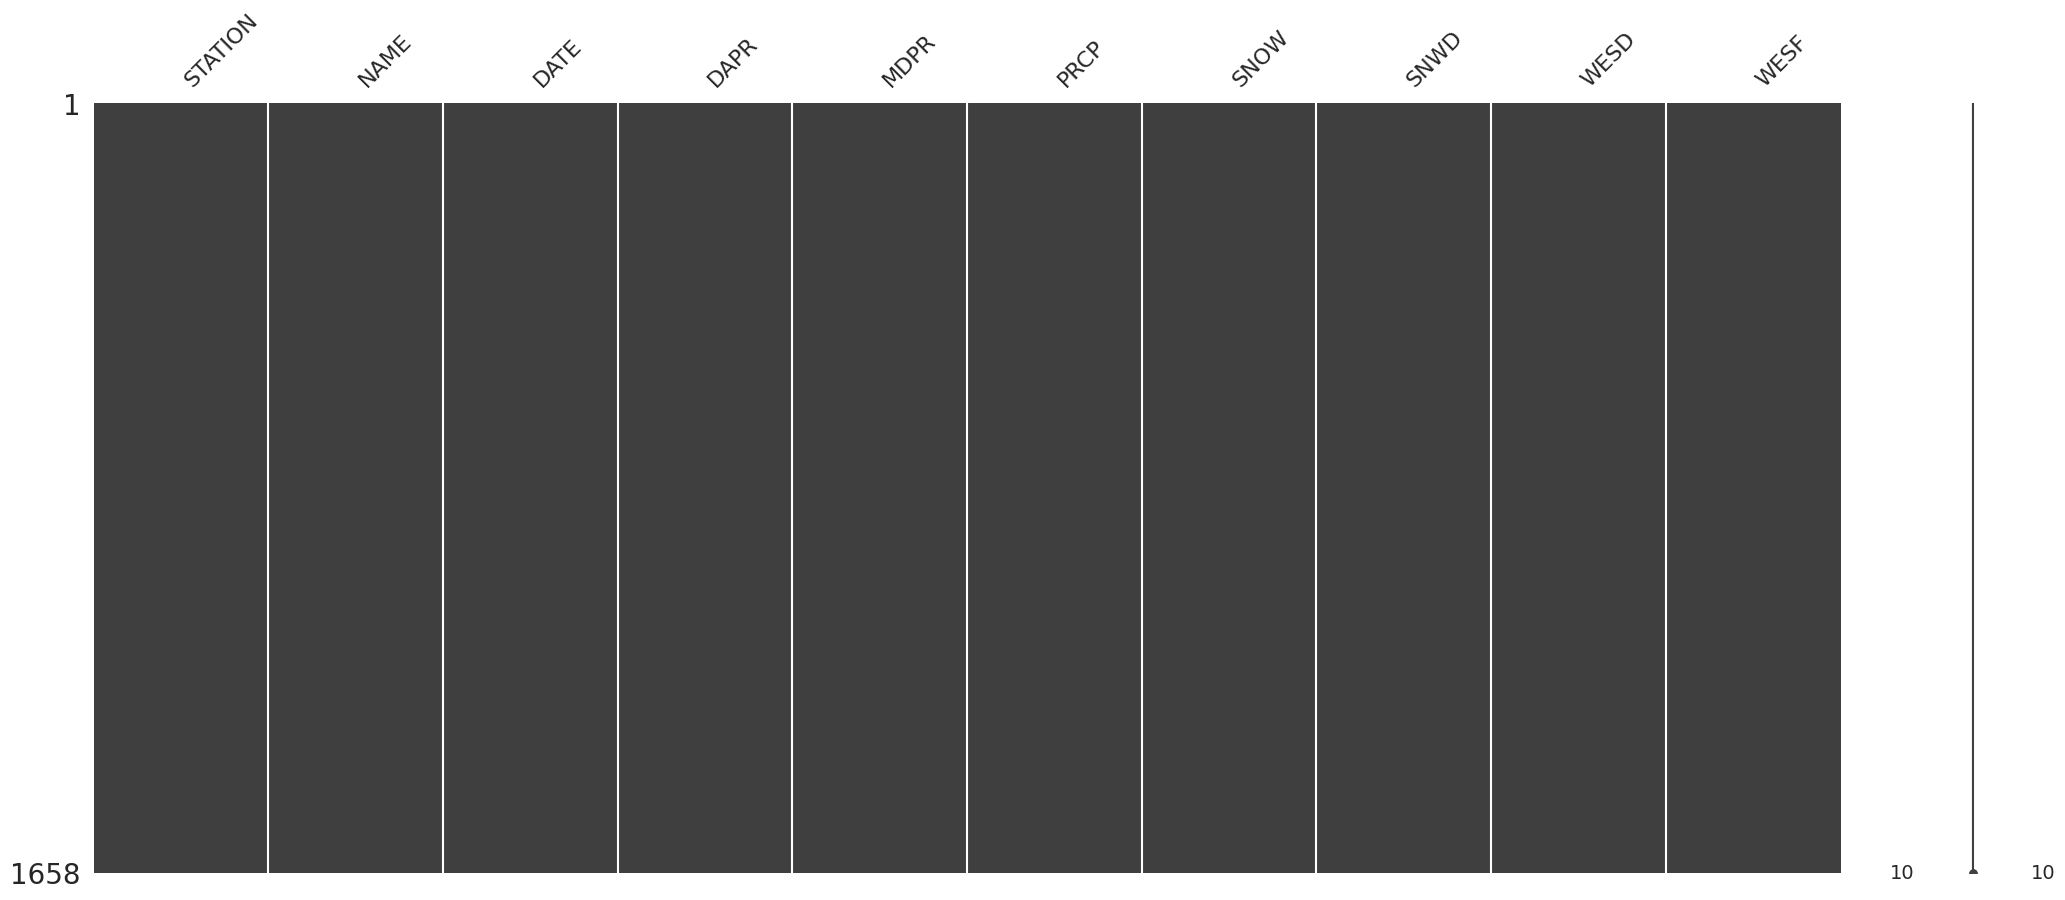

In [ ]:
msno.matrix(df_seattle)

<Axes: >

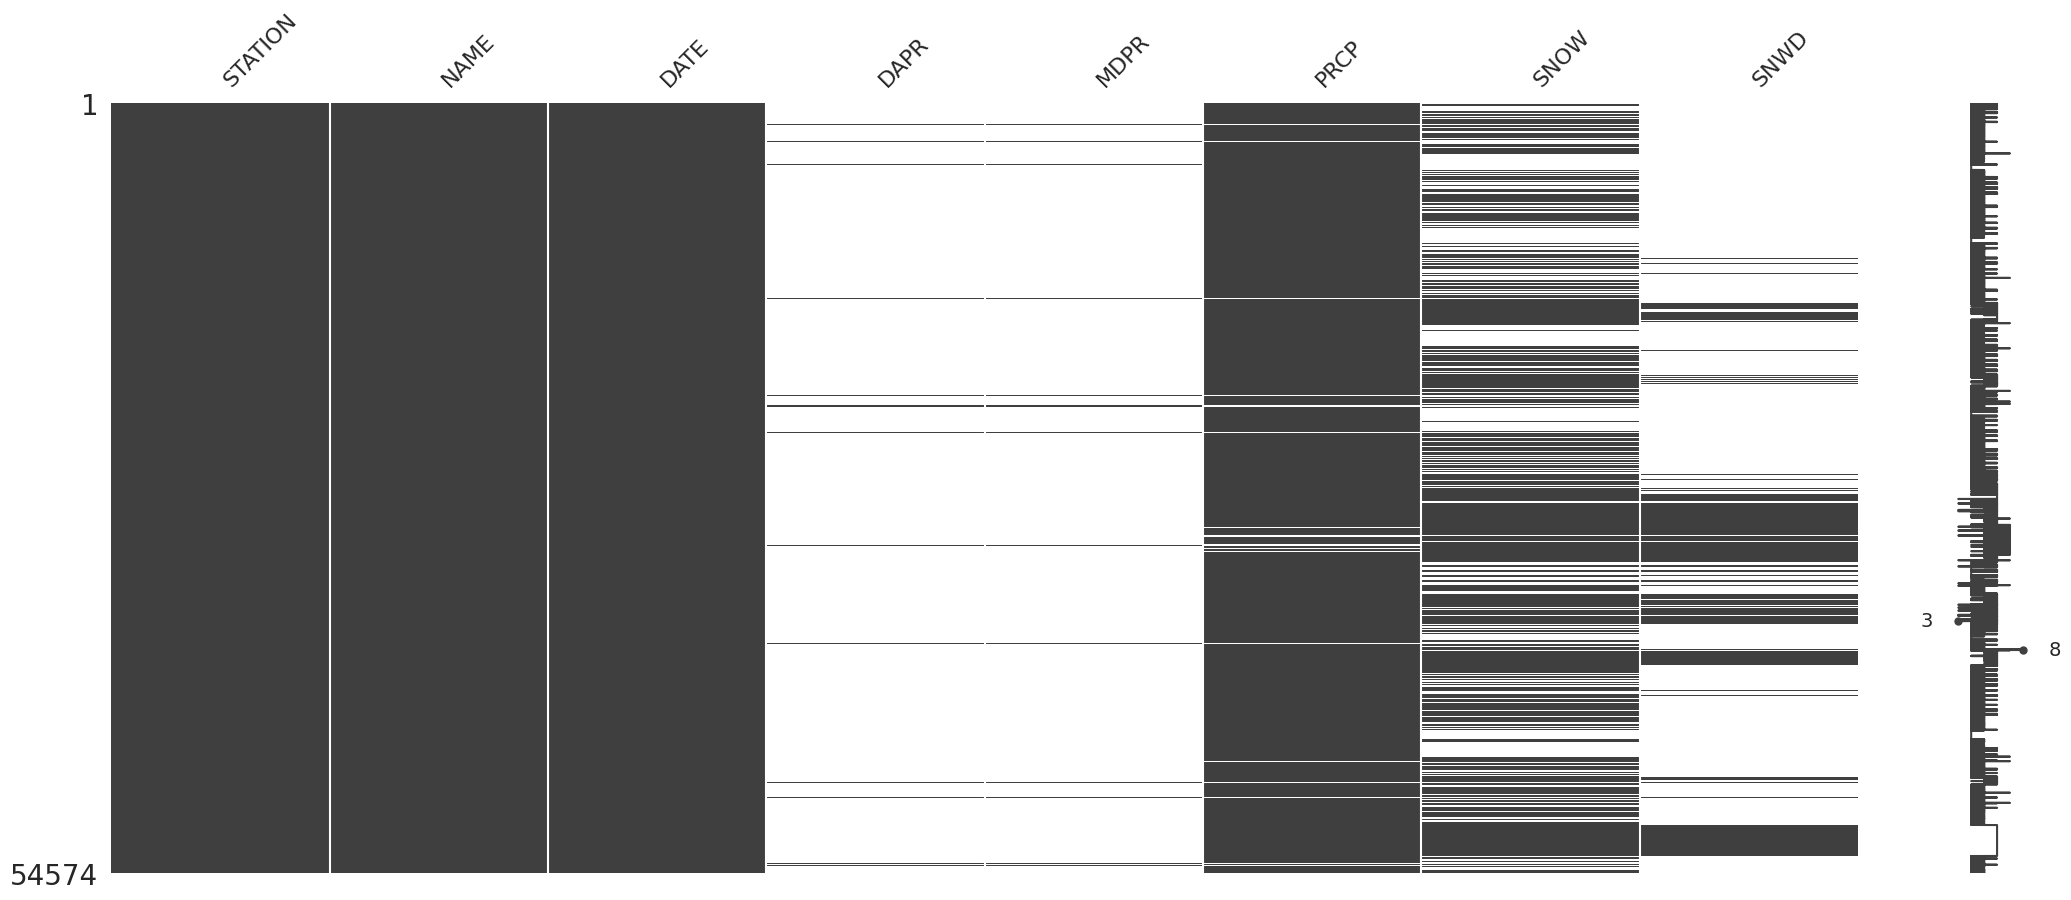

In [ ]:
msno.matrix(df_stlouis)

Alright, it looks like we're still missing data in the St. Louis data set. Let's learn how to deal with it. 

### Impute missing values

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

Define a column that labels each day by the day of the year: 1, 2, ..., 365.

In [ ]:
df.head()

,date,city,precipitation
0,2017-01-01,STL,0.00
1,2017-01-03,STL,0.35
2,2017-01-04,STL,0.03
3,2017-01-05,STL,0.04
4,2017-01-06,STL,0.00


In [ ]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

Here's a breakdown of what each part of the code does:

* `pd.DatetimeIndex(df['date'])` creates 
a Pandas DatetimeIndex object from the values in the 'date' column of the data frame df. This allows us to perform various operations on the date values, such as extracting the day of the year.
* `.day_of_year` extracts the day of the year (1-365 or 1-366 for leap years) from each date value in the DatetimeIndex object.
* `df['day_of_year'] =` assigns the day of the year values to a new column called 'day_of_year' in the df data frame.

Display the first 30 days of year:

In [ ]:
df.head(30)

,date,city,precipitation,day_of_year
0,2017-01-01,STL,0.00,1
1,2017-01-03,STL,0.35,3
2,2017-01-04,STL,0.03,4
3,2017-01-05,STL,0.04,5
4,2017-01-06,STL,0.00,6
5,2017-01-10,STL,0.00,10
6,2017-01-11,STL,0.00,11
7,2017-01-12,STL,0.00,12
8,2017-01-13,STL,0.00,13
9,2017-01-14,STL,0.51,14


In [ ]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
77,2017-04-29,STL,NaN,119
136,2017-07-23,STL,NaN,204
293,2018-04-23,STL,NaN,113
359,2018-09-20,STL,NaN,263
408,2018-12-03,STL,NaN,337
...,...,...,...,...
109021,2022-03-21,SEA,NaN,80
109022,2022-03-22,SEA,NaN,81
109023,2022-03-23,SEA,NaN,82
109024,2022-03-24,SEA,NaN,83


`df[df['precipitation'].isna()]` creates a new data frame that includes only the rows of df where the 'precipitation' column has a missing value.

We can see here that precipitation is missing values. 

Get the index of each row where precipitation is missing.

The code `indices = np.where(df['precipitation'].isna()==True)[0]` uses NumPy's where function to find the row indices in the Pandas data frame df where the 'precipitation' column has a missing value

In [ ]:
indices = np.where(df['precipitation'].isna()==True)[0]
indices

Compute the mean precipitation for each day in Seattle, averaged across years.

In [ ]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [ ]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052162
2,0.158571
3,0.858349
4,0.385909
5,0.249857
...,...
362,0.118390
363,0.094000
364,0.275128


For each missing value, let's replace it with the mean daily precipitation. 

In [ ]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Check for no missing values

In [ ]:
indices

array([    77,    136,    293, ..., 109023, 109024, 109025])

## Numerical summaries

Use `describe()` to provide a summary statistics for the numerical columns in the `df` DataFrame

In [ ]:
df.describe()

,precipitation,day_of_year
count,95041.000000,109148.000000
mean,0.123047,185.672646
std,0.334022,103.004268
min,0.000000,1.000000
25%,0.000000,99.000000
50%,0.000000,187.000000
75%,0.080000,274.000000
max,10.350000,366.000000


Find the maximum and the minimum

In [ ]:
df['precipitation'].max()

10.35

In [ ]:
df['precipitation'].min()

0.0

Do a numerical summary grouped by City 

In [ ]:
df.groupby(by='city').describe()

precipitation                                                   \
             count      mean       std  min  25%   50%   75%    max   
city                                                                  
SEA        41898.0  0.108578  0.241945  0.0  0.0  0.01  0.11   2.60   
STL        53143.0  0.134454  0.391265  0.0  0.0  0.00  0.05  10.35   

     day_of_year                                                         
           count        mean        std  min   25%    50%    75%    max  
city                                                                     
SEA      54574.0  185.672646  103.00474  1.0  99.0  187.0  274.0  366.0  
STL      54574.0  185.672646  103.00474  1.0  99.0  187.0  274.0  366.0

## Plots

The code below creates a line plot that visualizes how the precipitation amount (in inches) varies over time for St. Louis and Seattle. 

Blue lines = St. Louis 

Orange lines = Seattle 

This plot allows us to easily compare the trends in precipitation amounts over time between the two cities. We can see which cities tend to have more or less precipitation on average, and whether there are any patterns or fluctuations in the precipitation amounts over time.

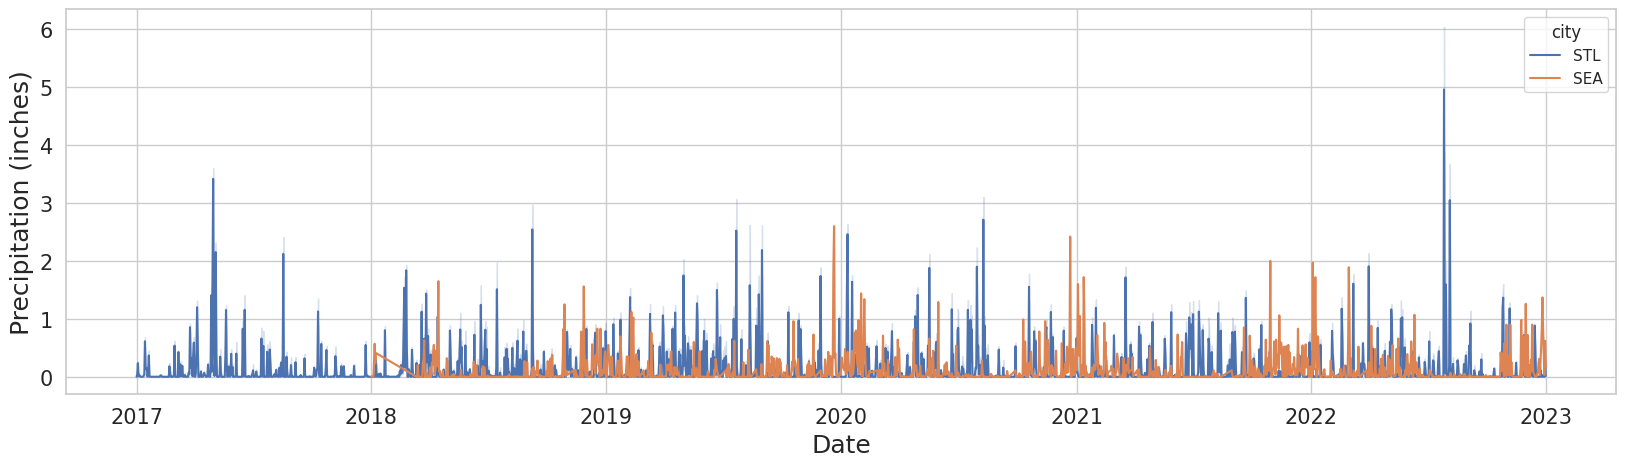

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

The code below creates a line plot that visualizes how the precipitation amount (in inches) varies over different months for the two cities.

In [ ]:
df['month'] = pd.to_datetime(df['date']).dt.month


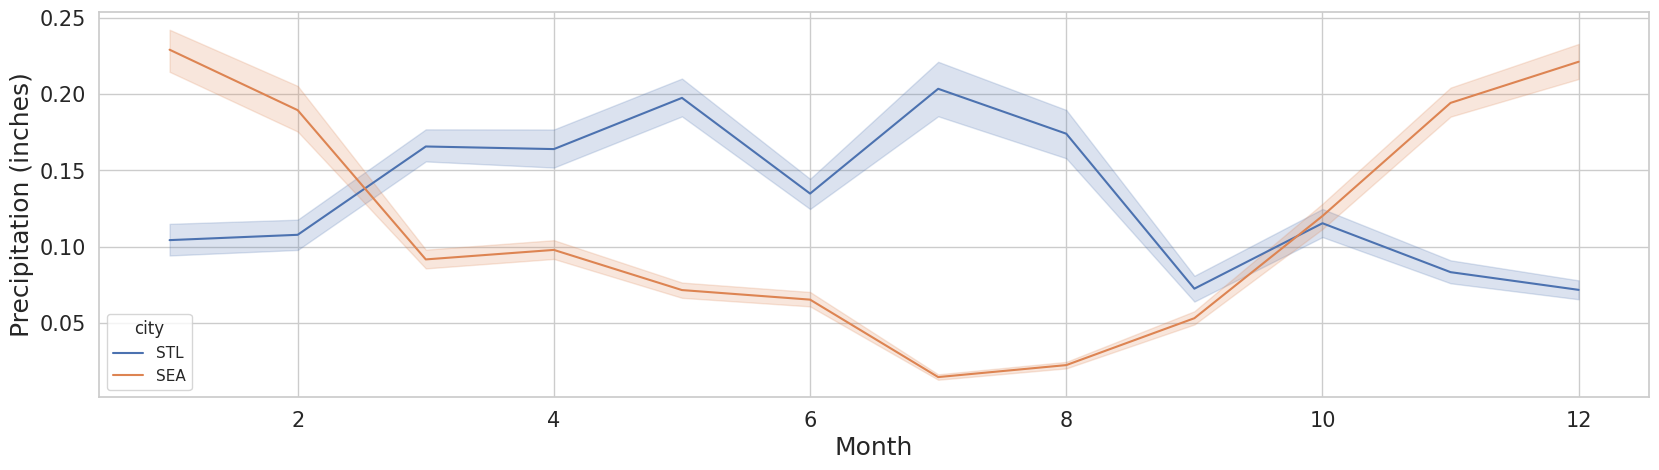

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

The code below creates a bar plot that visualizes how the precipitation amount (in inches) compares between the two cities.

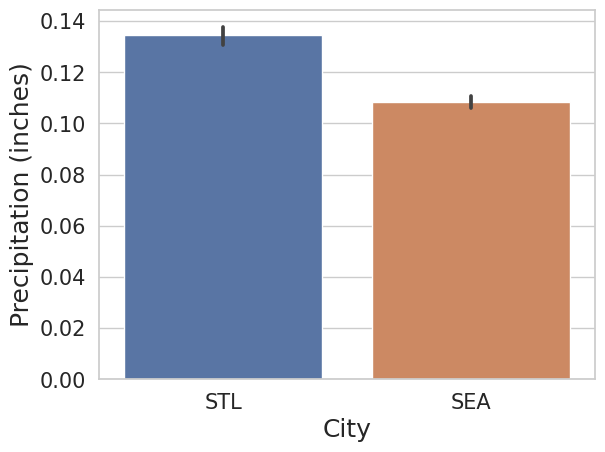

In [ ]:
sns.barplot(data=df, x='city', y='precipitation')

plt.xlabel('City', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

The code below creates a box plot that visualizes how the precipitation amount (in inches) varies over different months for the two cities.

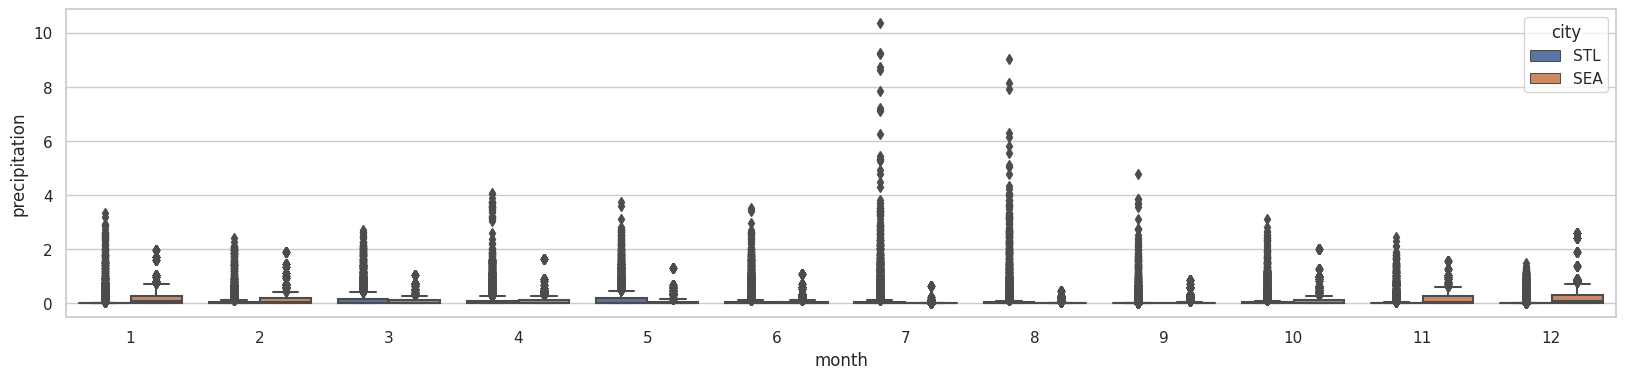

In [ ]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city');

We can use `plt.ylim(0,.8)` to set the range so that we can see the visual better. See how we can see the color coded box plots now? 

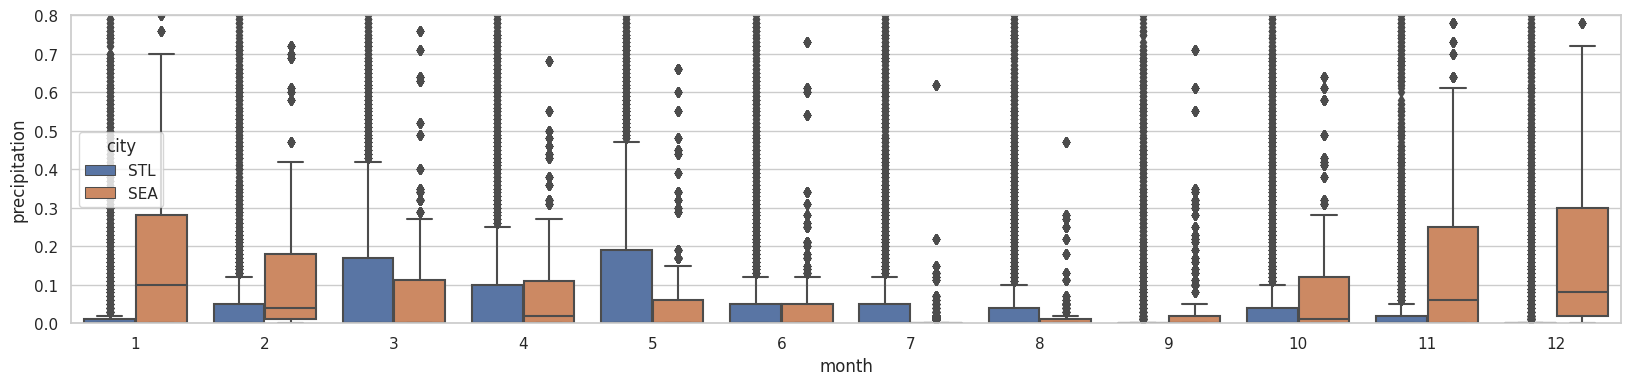

In [ ]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city')

plt.ylim(0,.8);

The `sns.stripplot()` function overlays a stripplot on top of the boxplot. 

The `x`, `y`, and `hue` parameters are the same as for the boxplot.

The `dodge=True` parameter separates the points for each city to avoid overlap.

The `legend=False` parameter removes the legend.



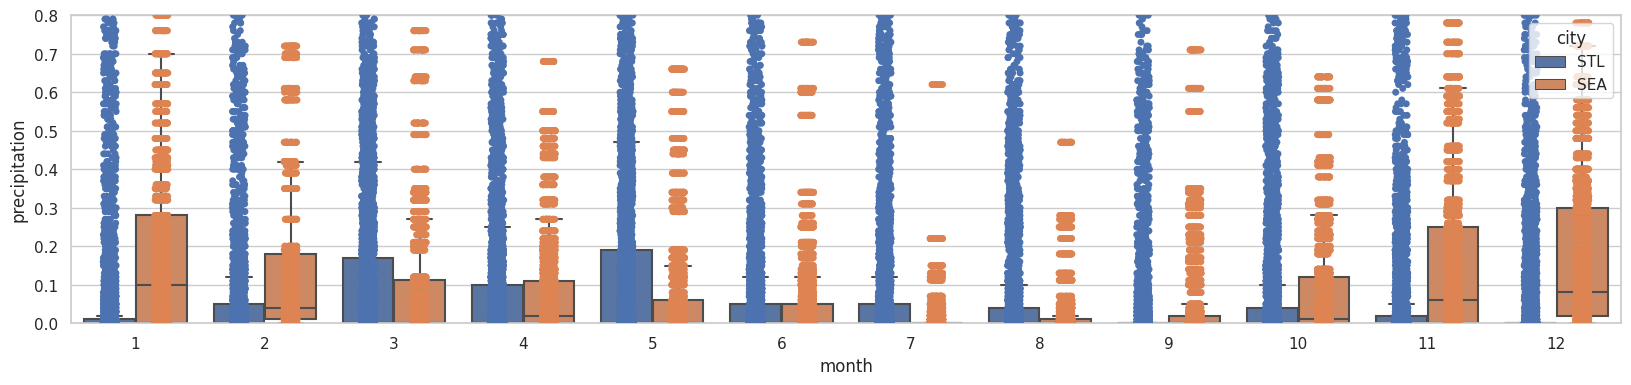

In [ ]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city', fliersize=0)

sns.stripplot(data = df, x = 'month', y = 'precipitation', hue='city', dodge=True, legend=False)
plt.ylim(0,.8);

## Export the clean .csv file

In [ ]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>